# **Decision Tree**

### **Importing Libraries**

In [1]:
# Data Analysis Library

import numpy as np
import pandas as pd

In [2]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-cp37-none-any.whl size=60009 sha256=12f15801143e210ceb330f9f55b265e611fa3ff49f2f4d656299a0a58d71426b
  Stored in directory: /root/.cache/pip/wheels/b9/4b/20/0bde3e04ace9178327ffabf575f9bbc4abb1d0c4f8c355306a
Successfully built dtreeviz


In [3]:
# Libraries to plot graph

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import graphviz
from dtreeviz.trees import dtreeviz

In [4]:
# Libraries for implementation and prediction of algo

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

### **About Dataset**

In [5]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### **Data Visulization**

**sns.lmplot():** Plot data and regression model fits across a FacetGrid.

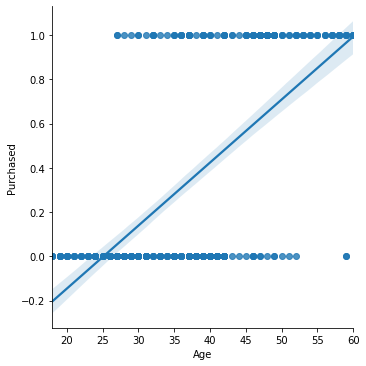

In [8]:
sns.lmplot(x='Age',y ='Purchased', data=df)

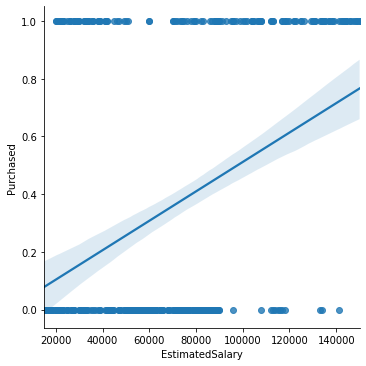

In [9]:
sns.lmplot(x='EstimatedSalary',y ='Purchased', data=df)

Text(0.5, 0, 'Purchased')

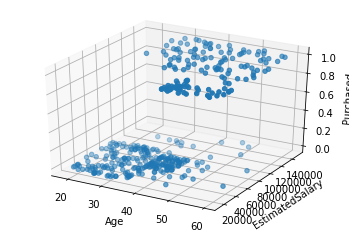

In [10]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 400)
zdata = 1 * np.random.random(400)
ax.scatter3D(df['Age'], df['EstimatedSalary'], df['Purchased'],cmap = 'Blues')
ax.set_xlabel('Age', fontsize= 10)
ax.set_ylabel("EstimatedSalary", fontsize=10)
ax.set_zlabel("Purchased", fontsize=10)

### **Spliting Data Into Train and Test Sets**

In [11]:
# Replacing Column names with numbers

df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
X_df = df.drop([0, 1, 4], axis = 1)
Y_df = df[4]

In [13]:
# Splitinh dataset

X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.33, random_state=42)

### **Feature Scaling**

**StandardScaler():** Standardize features by removing the mean and scaling to unit variance. The standard score of a sample **x** is calculated as:

> z = (x - u) / s

Here, **u:** mean, **s:** standard deviation

**fit_transform():** Fit to data, then transform it.

**transform():** Perform standardization by centering and scaling.

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Training Model**

##### **Model Instance**

In [15]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)  

##### **Fitting Data in Model**

**fit():** Compute the mean and std to be used for later scaling.

In [16]:
model = model.fit(X_train, Y_train)

### **Ploting Tree**

##### **Using plot_tree()**

[Text(147.07285714285715, 209.6742857142857, 'X[0] <= 0.389\nentropy = 0.924\nsamples = 268\nvalue = [177, 91]'),
 Text(57.394285714285715, 194.14285714285714, 'X[1] <= 0.592\nentropy = 0.624\nsamples = 186\nvalue = [157, 29]'),
 Text(28.697142857142858, 178.61142857142858, 'X[0] <= -0.101\nentropy = 0.203\nsamples = 158\nvalue = [153, 5]'),
 Text(19.13142857142857, 163.07999999999998, 'entropy = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(38.26285714285714, 163.07999999999998, 'X[1] <= -0.087\nentropy = 0.489\nsamples = 47\nvalue = [42, 5]'),
 Text(28.697142857142858, 147.54857142857142, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(47.82857142857143, 147.54857142857142, 'X[1] <= 0.001\nentropy = 0.755\nsamples = 23\nvalue = [18, 5]'),
 Text(38.26285714285714, 132.01714285714286, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(57.394285714285715, 132.01714285714286, 'X[1] <= 0.385\nentropy = 0.684\nsamples = 22\nvalue = [18, 4]'),
 Text(47.82857142857143, 116.485714285

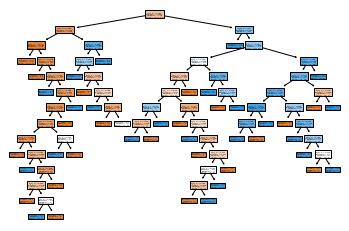

In [17]:
tree.plot_tree(model, filled = True) 

##### **Using graphviz**

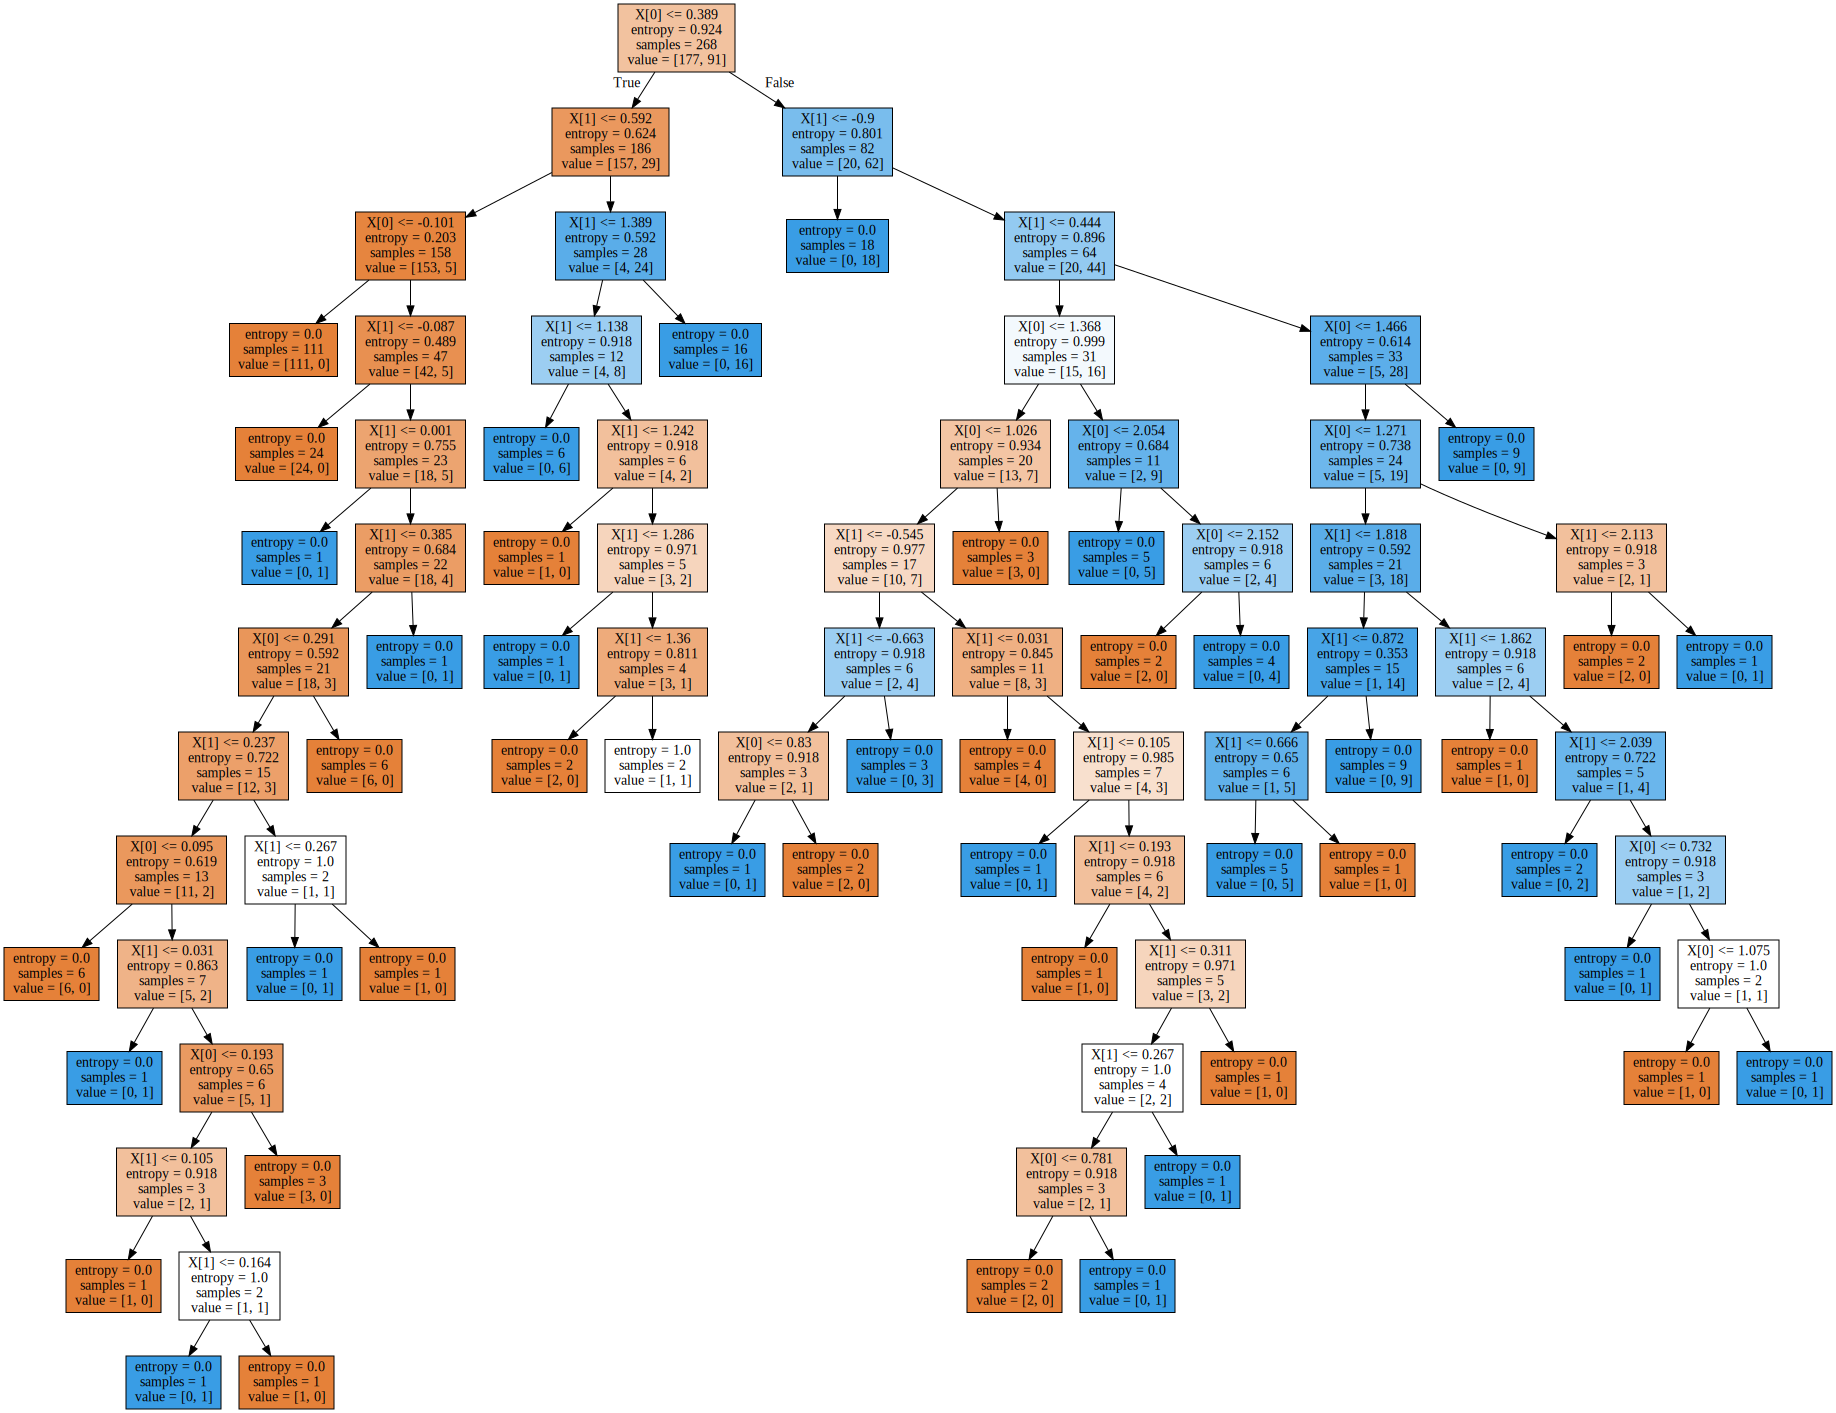

In [18]:
plot = tree.export_graphviz(model, out_file=None, filled=True)
graph = graphviz.Source(plot, format="png") 
graph

##### **Using dtreeviz**

In [19]:
plot = dtreeviz(model, X_train, Y_train)
plot
plot.save("train_decision_tree.svg")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [20]:
plot = dtreeviz(model, X_test, Y_test)
plot
plot.save("test_decision_tree.svg")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### **Model Prediction**

In [21]:
train_pred = model.predict(X_train)

In [22]:
pred = model.predict(X_test)

### **Model Evaluation For Training Data**

##### **Confusion Matrix**

In [23]:
cm = confusion_matrix(Y_train, train_pred)
print(cm)

[[177   0]
 [  1  90]]


##### **Accuracy**

In [24]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Train Accuracy:", accuracy)

Train Accuracy: 0.996268656716418


##### **Calculating Error**

In [25]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_train, train_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_train, train_pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_train, train_pred)))

Mean Absolute Error: 0.0037313432835820895
Mean Squared Error: 0.0037313432835820895
Root Mean Square Error: 0.06108472217815261


##### **Precision, Recall, F1 Score**

In [26]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)

Precision: 1.0
Recall: 0.9943820224719101
F-Score: 0.9971830985915492


##### **Ploting Graph**

Text(0, 0.5, 'Train Predicted Y')

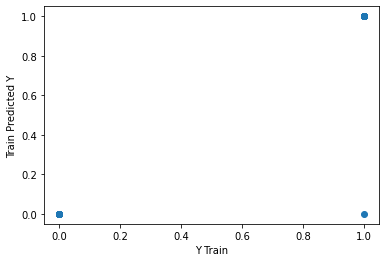

In [27]:
plt.scatter(Y_train,train_pred)
plt.xlabel('Y Train')
plt.ylabel('Train Predicted Y')

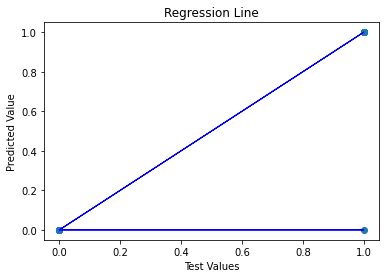

In [28]:
plt.title("Regression Line")
plt.xlabel("Test Values")
plt.ylabel("Predicted Value")
plt.plot(Y_train, train_pred, color='blue', linewidth=1)
plt.scatter(Y_train,train_pred)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


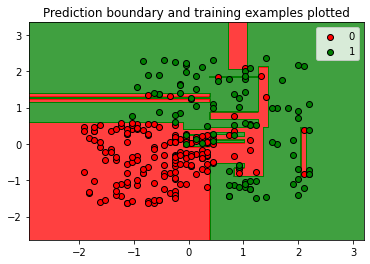

In [29]:
plt.figure(1)

X_set, Y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j, linewidths = 1, edgecolor = 'black')

plt.title('Prediction boundary and training examples plotted')
plt.legend()
plt.show()

### **Model Evaluation For Testing Data**

##### **Confusion Matrix**

In [30]:
cm = confusion_matrix(Y_test, pred)
print(cm)

[[71  9]
 [ 9 43]]


##### **Accuracy**

In [31]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Accuracy:", accuracy)

Accuracy: 0.8636363636363636


##### **Calculating Error**

In [32]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.13636363636363635
Mean Squared Error: 0.13636363636363635
Root Mean Square Error: 0.3692744729379982


##### **Precision, Recall, F1 Score**

In [33]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)

Precision: 0.8875
Recall: 0.8875
F-Score: 0.8875


##### **Ploting Graph**

Text(0, 0.5, 'Predicted Y')

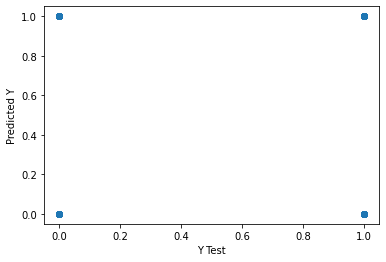

In [34]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

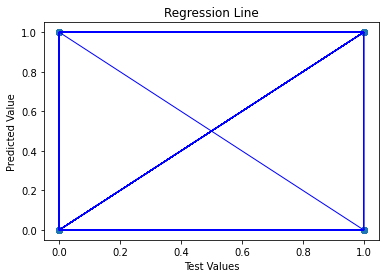

In [35]:
plt.title("Regression Line")
plt.xlabel("Test Values")
plt.ylabel("Predicted Value")
plt.plot(Y_test, pred, color='blue', linewidth=1)
plt.scatter(Y_test,pred)
plt.show()

**np.meshgrid():** Return coordinate matrices from coordinate vectors.

**ListedColormap():** Used to create color maps from the given list of colors.

**plt.contourf():** Draw filled contour.

**plt.arange():** Return evenly spaced values within a given interval.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


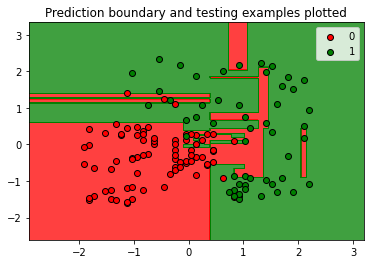

In [36]:
plt.figure(2)

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j, linewidths = 1, edgecolor = 'black')

plt.title('Prediction boundary and testing examples plotted')
plt.legend()
plt.show()